In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DAYS_INDEX = 425

In [4]:
data = pd.read_csv('./data.csv', index_col=0)
normalized_data = data[data['paid_total'] > 0.1]


In [5]:
normalized_power = []
for power in normalized_data['power']:
    mesure = power.split()[-1]
    amount = float(power.split()[0])
    if mesure == 'Mh/s':
        normalized_power.append(amount)
    elif mesure == 'Gh/s':
        normalized_power.append(amount * 1000)
    elif mesure == 'h/s':
        normalized_power.append(amount * 0)
    else:
        print(mesure)

normalized_data = normalized_data.assign(power_in_mh=normalized_power)

In [6]:
days_of_mining = normalized_data['paid_total'] * normalized_data['power_in_mh'] / DAYS_INDEX
normalized_data['days'] = days_of_mining
# REMOVE noize
normalized_data = normalized_data[normalized_data['days'] < 2000]

In [7]:
normalized_data.loc['0xcae89dec6b173b03e09d76030d016f37b9404a04', :]

paid_total       16.4681
power          2.14 Gh/s
power_in_mh         2140
days             82.9215
Name: 0xcae89dec6b173b03e09d76030d016f37b9404a04, dtype: object

In [8]:
normalized_data.describe()

,paid_total,power_in_mh,days
count,980.000000,980.000000,980.000000
mean,7.326946,443.920898,20.452553
std,18.160035,1307.395224,102.632353
min,0.100020,0.000000,0.000000
25%,1.129428,100.330000,0.305333
50%,3.061465,191.110000,1.207672
75%,6.683632,388.195000,5.052517
max,356.431510,28460.000000,1678.692003


In [9]:
data.describe()

# RAW REAL DATA

,paid_total
count,1445.000000
mean,5.522390
std,21.421479
min,0.000000
25%,0.000000
50%,1.209320
75%,4.584030
max,478.563290


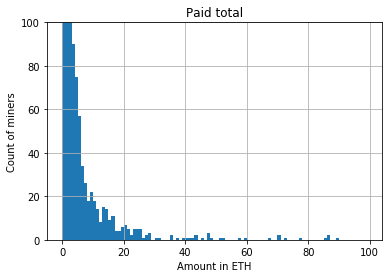

In [10]:
bins = np.arange(0, 100, 1)
plt.title('Paid total')
plt.hist(data['paid_total'], bins=bins)
plt.xlabel('Amount in ETH')
plt.ylabel('Count of miners')
plt.ylim([0, 100])
plt.grid()

plt.show()

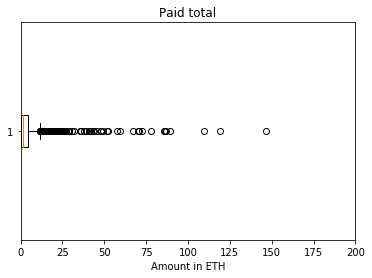

In [11]:
plt.boxplot(data['paid_total'], vert=False, autorange=False)
plt.title('Paid total')
plt.xlabel('Amount in ETH')
plt.xlim([0, 200])
plt.show()

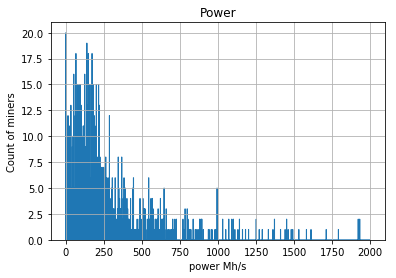

In [12]:
bins = np.arange(0, 2000, 1)
plt.title('Power')
plt.hist(normalized_data['power_in_mh'], bins=bins, histtype='step')
plt.xlabel('power Mh/s')
plt.ylabel('Count of miners')
plt.grid()

plt.show()

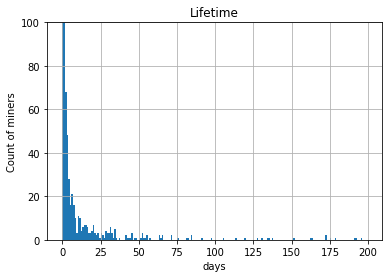

In [13]:
bins = np.arange(0, 200, 1)
plt.title('Lifetime')
plt.hist(normalized_data['days'], bins=bins, histtype='stepfilled')
plt.ylim([0, 100])
plt.xlabel('days')
plt.ylabel('Count of miners')
plt.grid()

plt.show()

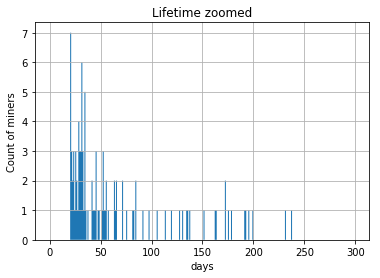

In [14]:
bins = np.arange(0, 300, 1)
plt.title('Lifetime zoomed')
plt.hist(normalized_data[normalized_data.days > 20]['days'] , bins=bins, histtype='stepfilled')
plt.xlabel('days')
plt.ylabel('Count of miners')
plt.grid()

plt.show()